In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_train = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\train_ctrUa4K.csv'
loan_test = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\test_lAUu6dG.csv'

In [3]:
loan_train = pd.read_csv(loan_train)
loan_test = pd.read_csv(loan_test)

In [4]:
loan_test_copy = loan_test

In [5]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Before we build our model lets first understand the given data by performing univariate and bivariate analysis. We do univariate analysis to summarise and describe individual variable and find pattern in it and Bivariate analysis is done to check corelation between each variable in the dataset with the target variable.

Univariate Analysis

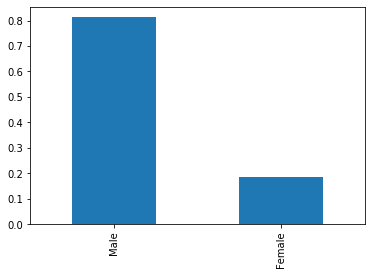

In [6]:
loan_train["Gender"].value_counts(normalize=True).plot.bar()

Around 80% of the loan applicants are Male

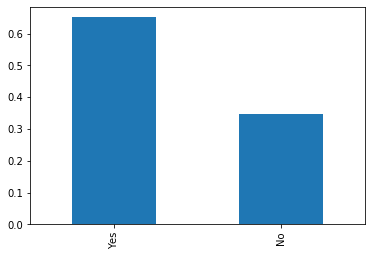

In [7]:
loan_train["Married"].value_counts(normalize=True).plot.bar()

Approx 65% of applicants are Married

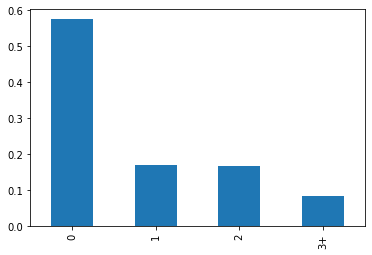

In [8]:
loan_train["Dependents"].value_counts(normalize=True).plot.bar()

More than 50% of the applicants don't have Dependents

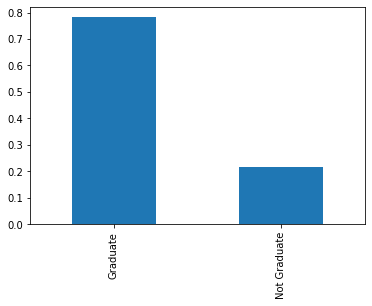

In [9]:
loan_train["Education"].value_counts(normalize=True).plot.bar()

Around 80% of the applicants are Graduate

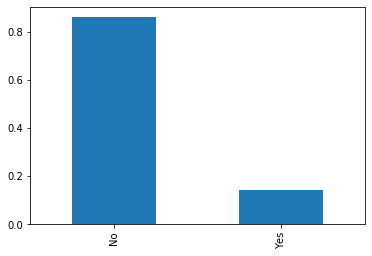

In [10]:
loan_train["Self_Employed"].value_counts(normalize=True).plot.bar()

Majority of the applicants are working proffessionals

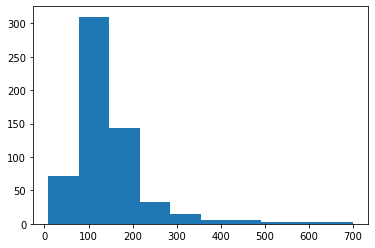

In [12]:
plt.hist(loan_train["LoanAmount"])
plt.show()

Distribution is relatively normal but it is right skewed, due to presence of outliers

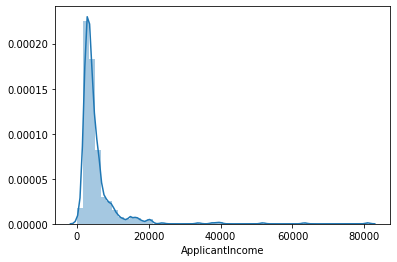

In [13]:
sns.distplot(loan_train["ApplicantIncome"])

Distribution is right skewed due to outliers.
Does education has any role in ones higher income? lets plot a box plot to find the answer

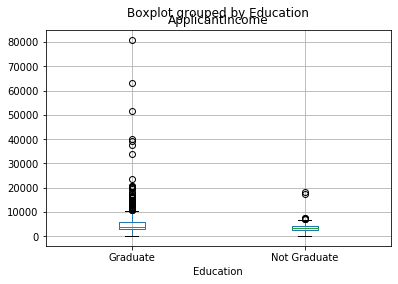

In [14]:
loan_train.boxplot(column="ApplicantIncome",by="Education")
plt.show()

From box plot we can see that graduates have higher income compared to non graduates.

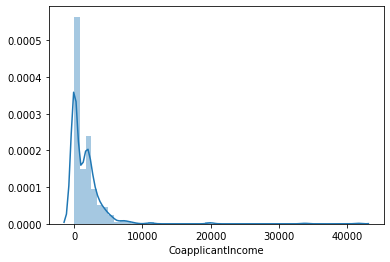

In [15]:
sns.distplot(loan_train["CoapplicantIncome"])

Distribution is similar to applicant income

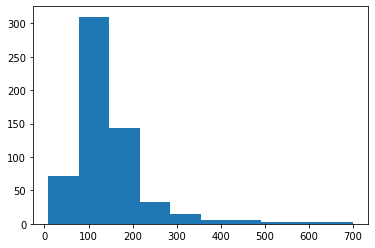

In [19]:
plt.hist(loan_train["LoanAmount"])
plt.show()

Distribution is relatively normal but it is right skewed, due to presence of outliers.

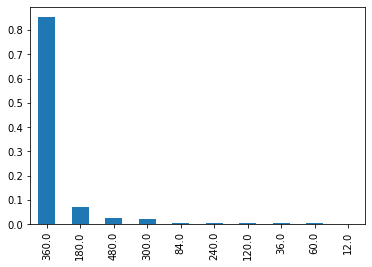

In [20]:
loan_train["Loan_Amount_Term"].value_counts(normalize=True).plot.bar()

Majority of the applicants have opted for 360 months period to return their loan.

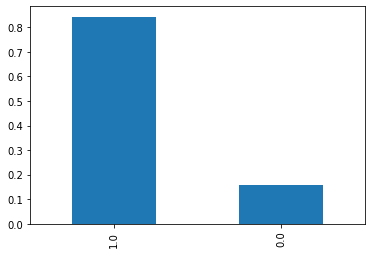

In [21]:
loan_train["Credit_History"].value_counts(normalize=True).plot.bar()

Around 80% of the applicants have credit history

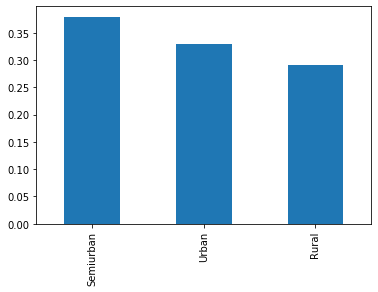

In [22]:
loan_train["Property_Area"].value_counts(normalize=True).plot.bar()

35% of loan applicants live in semiurban area

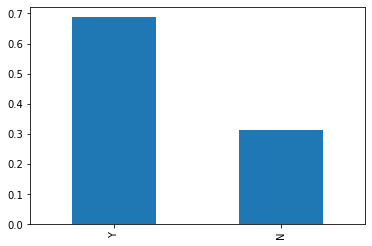

In [23]:
loan_train["Loan_Status"].value_counts(normalize=True).plot.bar()

Around 69% of the loan application were approved

# To summarize most of the loan applicants are graduate working professionals living in semiurban area who are married and don't have dependents

Bivariate Analysis

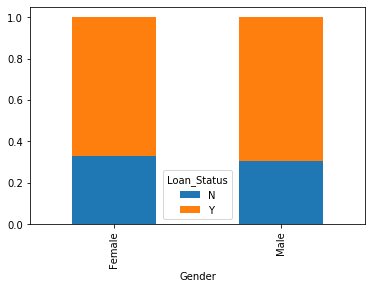

In [24]:
pd.crosstab(loan_train["Gender"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

More or less same percentage of loan applications have been approved for both male & female

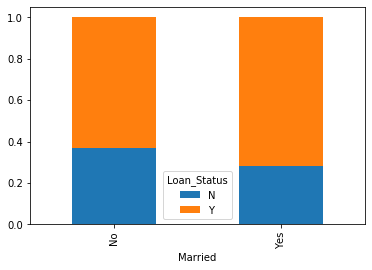

In [25]:
pd.crosstab(loan_train["Married"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Married applicants have more chances of getting loan approved

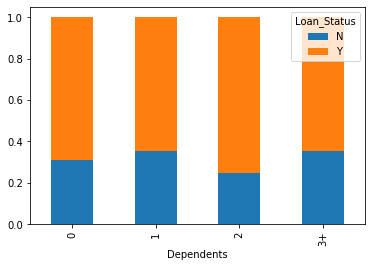

In [26]:
pd.crosstab(loan_train["Dependents"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Number of dependents  doesn't impact ones approval for loan

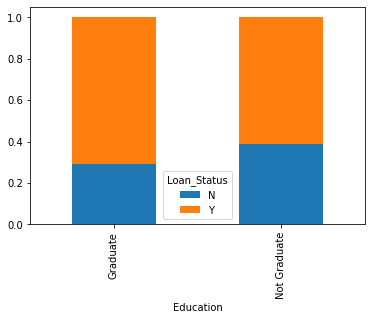

In [27]:
pd.crosstab(loan_train["Education"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Graduates have more chances of getting their loan approved then non graduates

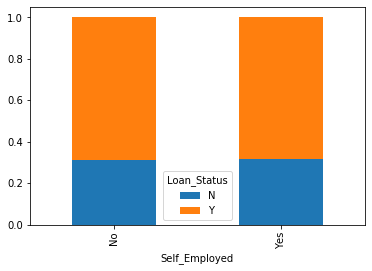

In [28]:
pd.crosstab(loan_train["Self_Employed"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Working proffesional or self employed have similar approval rate

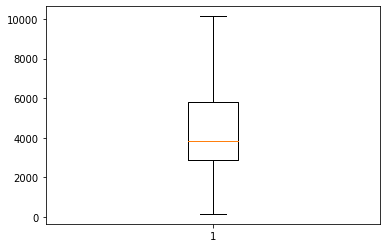

In [29]:
plt.boxplot(x="ApplicantIncome",data=loan_train,showfliers=False)
plt.show()

In [30]:
bins = [0,2000,4000,6000,8000,10000,81000]
groups = ["low","average","medium","medium_high","high","very_high"]
loan_train["Income_bin"] = pd.cut(loan_train["ApplicantIncome"],bins,labels=groups)
loan_train["Income_bin"].value_counts()

average        293
medium         143
medium_high     54
very_high       52
low             41
high            31
Name: Income_bin, dtype: int64

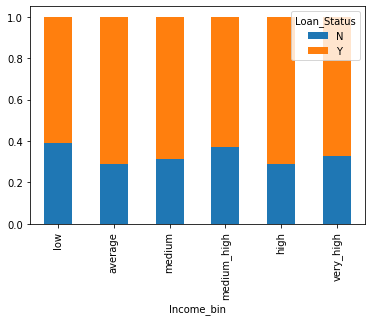

In [31]:
pd.crosstab(loan_train["Income_bin"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Assuming that high income Applicants will have higher approval rate isn't true as we can see that approval rate amongst all income group is some what similar.

In [32]:
# we will drop Income_bin as we had created it for data exploration only
loan_train = loan_train.drop("Income_bin",axis=1)

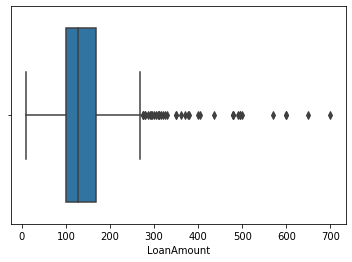

In [33]:
sns.boxplot(x="LoanAmount",data=loan_train)
plt.show()

In [34]:
bins = [0,100,200,300,700]
groups = ["low","medium","high","very_high"]
loan_train["LoanAmount_bin"] = pd.cut(loan_train["LoanAmount"],bins,labels=groups)
loan_train["LoanAmount_bin"].value_counts()

medium       358
low          154
high          51
very_high     29
Name: LoanAmount_bin, dtype: int64

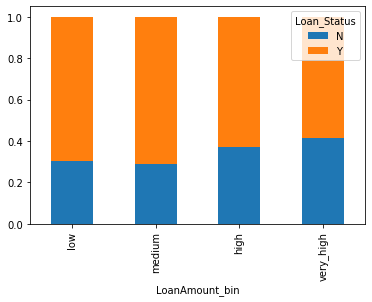

In [35]:
pd.crosstab(loan_train["LoanAmount_bin"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Higher the loan amount lesser the chances of getting loan approved

In [36]:
# we will drop LoanAmount_bin as we had created it for data exploration only
loan_train = loan_train.drop("LoanAmount_bin",axis=1)

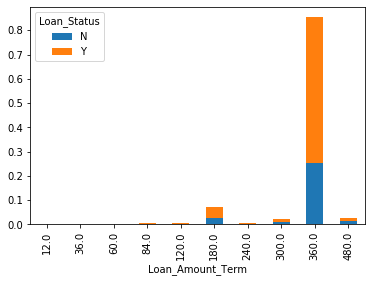

In [37]:
pd.crosstab(loan_train["Loan_Amount_Term"],loan_train["Loan_Status"],normalize=True).plot.bar(stacked=True)

Loan term doesn't affect loan application

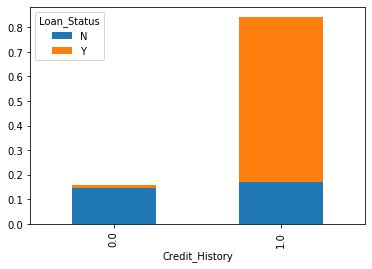

In [38]:
pd.crosstab(loan_train["Credit_History"],loan_train["Loan_Status"],normalize=True).plot.bar(stacked=True)

Having a credit history has very high impact on getting loan approval

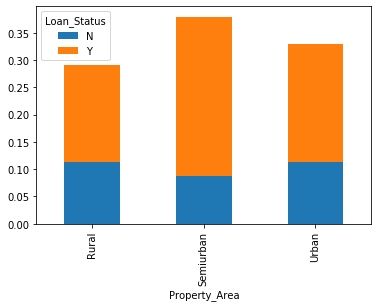

In [39]:
pd.crosstab(loan_train["Property_Area"],loan_train["Loan_Status"],normalize=True).plot.bar(stacked=True)

People living in semiurban area have higher chances of loan getting approved than that of people living in Rural & Urban area

# If Missing values (NaN values) are passed into a model it will give an error and also can reduce model accuracy significantly. So we will find missing value and treat them

In [7]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Treating Missing values
# Now that we have found missing values in variables, we have to fill them to treat them.
# There are many ways to fill missing values, widely used are filling them with Mean/Median/Mode and/or using linear regression/ Random Forest/ K nearest Neighbours method.
# I am using Mean/Median/Mode to fill the missing values
# For Numeric variables mean/median and for categorical and ordinal variables mode, are widely used method to fill missing values

In [9]:
loan_train.describe(exclude=np.number)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001917,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
# 489 out of 614 applicants are male, so we will impute male inplace of missing values
loan_train["Gender"] = loan_train["Gender"].fillna("Male")
loan_test["Gender"] = loan_test["Gender"].fillna("Male")

In [11]:
# 398 out of 614 applicants were married, so we will impute Yes inplace of missing values
loan_train["Married"] = loan_train["Married"].fillna("Yes")
loan_test["Married"] = loan_test["Married"].fillna("Yes")

# As Dependent variable is a numerical variable, but it is stored as object due to its value 3+, we will treat it and convert it to numeric variable

In [12]:
loan_train["Dependents"] = np.where(loan_train["Dependents"]=="3+",3,loan_train["Dependents"])

loan_test["Dependents"] = np.where(loan_test["Dependents"]=="3+",3,loan_test["Dependents"])

In [13]:
loan_train["Dependents"] = pd.to_numeric(loan_train["Dependents"],errors="coerce")
loan_test["Dependents"] = pd.to_numeric(loan_test["Dependents"],errors="coerce")

# As standard pratice we replace missing values of Numeric variables with mean. However, Dependent variable values are ordinal (0,1,2,3) so replacing them with mean of 0.763 doesn't make sense. So we will use Mode to impute missing values of Dependent variable

In [14]:
loan_train["Dependents"].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [15]:
# 345 out of 614 applicants don't have dependents, so we will impute 0 inplace of missing values
loan_train["Dependents"].fillna(loan_train["Dependents"].mode()[0],inplace=True)

loan_test["Dependents"].fillna(loan_test["Dependents"].mode()[0],inplace=True)

In [16]:
# 500 out of 614 applicants are not self employed, so we will impute No inplace of missing values
loan_train["Self_Employed"] = loan_train["Self_Employed"].fillna("No")
loan_test["Self_Employed"] = loan_test["Self_Employed"].fillna("No")

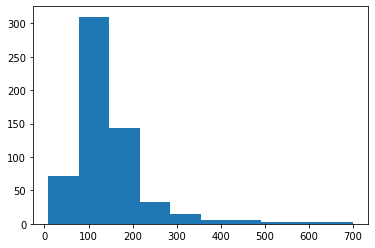

In [17]:
plt.hist(x="LoanAmount",data=loan_train)
plt.show()

# When we have a skewed distribution, the median is a better measure of central tendency than the mean. As we can see from above histogram plot of LoanAmount it is right skewed. So we are going to impute missing values with Median.

In [18]:
loan_train["LoanAmount"].median()

128.0

In [19]:
loan_test["LoanAmount"].median()

125.0

In [20]:
loan_train["LoanAmount"] = loan_train["LoanAmount"].fillna(128.0)
loan_test["LoanAmount"] = loan_test["LoanAmount"].fillna(125.0)

In [21]:
# As values of Loan Amount Term are also ordinal we will use mode to replace missing values
loan_train["Loan_Amount_Term"].fillna(loan_train["Loan_Amount_Term"].mode()[0],inplace=True)
loan_test["Loan_Amount_Term"].fillna(loan_test["Loan_Amount_Term"].mode()[0],inplace=True)

In [22]:
# As values of Credit History are also ordinal we will use mode to replace missing values
loan_train["Credit_History"].fillna(loan_train["Credit_History"].mode()[0],inplace=True)
loan_test["Credit_History"].fillna(loan_test["Credit_History"].mode()[0],inplace=True)

In [23]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# An Outlier is an observation in a given dataset that lies far from the rest of the observations. It vastly larger or smaller than the remaining values in the data set.Outliers increase variability of data, which decreases statical power of the model. 

# So we will first detect the outliers and than treat them.

Boxplots , Z-score and Inter Quantile Range(IQR) are some of the ways we can detect outliers

Any data point is important as it contains information, unless they are data entry errors, outliers should usually not be removed at all. so firstly we need to understand why is that data point different from others and treat it accordingly. 

Once we have indentified we can treat outliers by either deleting them, or imputing them with mean/median/mode or use inter quantile range or we can take log of it to reduce variablity.

we are going to use logarithmic method to treat outlier

In [55]:
# def remove_outlier_IQR(loan_train):
    #Q1=loan_train.quantile(0.25)
    #Q3=loan_train.quantile(0.75)
    #IQR=Q3-Q1
    #loan_train=loan_train[~((loan_train<(Q1-1.5*IQR)) | (loan_train>(Q3+1.5*IQR)))]
    #return loan_train

In [25]:
loan_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
# loan_train["ApplicantIncome_Combined"] = loan_train["ApplicantIncome"] + loan_train["CoapplicantIncome"]

In [27]:
loan_train["ApplicantIncome_logged"] = np.log(loan_train["ApplicantIncome"])

In [28]:
loan_test["ApplicantIncome_logged"] = np.log(loan_test["ApplicantIncome"])

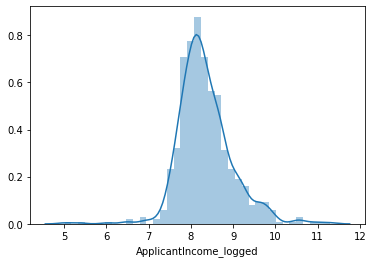

In [29]:
sns.distplot(loan_train["ApplicantIncome_logged"])

In [30]:
loan_train["LoanAmount_logged"] = np.log(loan_train["LoanAmount"])

In [31]:
loan_test["LoanAmount_logged"] = np.log(loan_test["LoanAmount"])

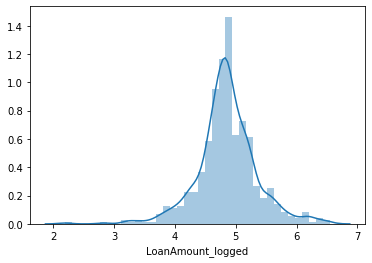

In [32]:
sns.distplot(loan_train["LoanAmount_logged"])

In [33]:
loan_train["Loan_Status"].replace("N",0,inplace=True)
loan_train["Loan_Status"].replace("Y",1,inplace=True)

In [34]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_logged,LoanAmount_logged
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,8.674026,4.852030
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,8.430109,4.852030
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,8.006368,4.189655
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,7.856707,4.787492
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,8.699515,4.948760


# Machine learning models require all input and output variables to be numeric. If we have categorical data, its needs to encoded to numbers. 

There are 2 ways of converting categorical data to numerical
1) One Hot Encoding
2) label encoding

we are going to use one hot encoding

In [35]:
loan_train = loan_train.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome"],axis=1)

In [36]:
loan_test = loan_test.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome"],axis=1)

In [37]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_logged,LoanAmount_logged
0,Male,No,0.0,Graduate,No,128.0,360.0,1.0,Urban,1,8.674026,4.852030
1,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,0,8.430109,4.852030
2,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,1,8.006368,4.189655
3,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,1,7.856707,4.787492
4,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,1,8.699515,4.948760


# get_dummies use one hot encoding to convert categorical columns to numerical and one of the disadvantage of one hot encoding is it increases dimensionality of the data, to avoid this we can use label encoding

In [38]:
loan_train = pd.get_dummies(loan_train)
loan_train.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_logged,LoanAmount_logged,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,128.0,360.0,1.0,1,8.674026,4.852030,0,1,1,0,1,0,1,0,0,0,1
1,1.0,128.0,360.0,1.0,0,8.430109,4.852030,0,1,0,1,1,0,1,0,1,0,0
2,0.0,66.0,360.0,1.0,1,8.006368,4.189655,0,1,0,1,1,0,0,1,0,0,1
3,0.0,120.0,360.0,1.0,1,7.856707,4.787492,0,1,0,1,0,1,1,0,0,0,1
4,0.0,141.0,360.0,1.0,1,8.699515,4.948760,0,1,1,0,1,0,1,0,0,0,1


In [39]:
loan_test = pd.get_dummies(loan_test)
loan_test.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_logged,LoanAmount_logged,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,110.0,360.0,1.0,8.651724,4.700480,0,1,0,1,1,0,1,0,0,0,1
1,1.0,126.0,360.0,1.0,8.031385,4.836282,0,1,0,1,1,0,1,0,0,0,1
2,2.0,208.0,360.0,1.0,8.517193,5.337538,0,1,0,1,1,0,1,0,0,0,1
3,2.0,100.0,360.0,1.0,7.757906,4.605170,0,1,0,1,1,0,1,0,0,0,1
4,0.0,78.0,360.0,1.0,8.094378,4.356709,0,1,1,0,0,1,1,0,0,0,1


In [40]:
loan_train.shape

(614, 18)

In [41]:
loan_test.shape

(367, 17)

In [42]:
X = loan_train.drop("Loan_Status",axis=1)

In [43]:
X.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_logged,LoanAmount_logged,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,128.0,360.0,1.0,8.674026,4.852030,0,1,1,0,1,0,1,0,0,0,1
1,1.0,128.0,360.0,1.0,8.430109,4.852030,0,1,0,1,1,0,1,0,1,0,0
2,0.0,66.0,360.0,1.0,8.006368,4.189655,0,1,0,1,1,0,0,1,0,0,1
3,0.0,120.0,360.0,1.0,7.856707,4.787492,0,1,0,1,0,1,1,0,0,0,1
4,0.0,141.0,360.0,1.0,8.699515,4.948760,0,1,1,0,1,0,1,0,0,0,1


In [44]:
y = loan_train["Loan_Status"]

In [45]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [48]:
X_train.shape

(429, 17)

In [49]:
X_test.shape

(185, 17)

In [50]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [92]:
xgb_params = {"n_estimators":[60,70,80,90,100]}

In [93]:
xgb1 = XGBClassifier(learning_rate=0.3, subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [94]:
grid_search = GridSearchCV(xgb1,cv=10,param_grid=xgb_params,scoring='roc_auc',verbose=2,n_jobs=-1)

In [95]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.1s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[18:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.8,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=...
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.8,
 

In [50]:
def report (results, n_top=3):
    for i in range (1,n_top+1):
        candidates=np.flatnonzero(results["rank_test_score"]==i)
        for candidate in candidates:
            print("model with rank {0}".format(i))
            print("mean validation score:{0:.3f}(std:{1:.3f})".format(results["mean_test_score"]
                    [candidate],results["std_test_score"][candidate]))
            print ("parameters:{0}".format(results["params"][candidate]))
            print("")

In [96]:
report(grid_search.cv_results_,5)

model with rank 1
mean validation score:0.748(std:0.097)
parameters:{'n_estimators': 90}

model with rank 2
mean validation score:0.747(std:0.097)
parameters:{'n_estimators': 80}

model with rank 3
mean validation score:0.746(std:0.099)
parameters:{'n_estimators': 60}

model with rank 4
mean validation score:0.746(std:0.100)
parameters:{'n_estimators': 70}

model with rank 5
mean validation score:0.745(std:0.101)
parameters:{'n_estimators': 100}



In [107]:
xgb_params2 = {"max_depth":range(3,10)}

In [109]:
xgb2 = XGBClassifier(learning_rate=0.3,n_estimators=90,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [110]:
grid_search = GridSearchCV(xgb2,cv=10,param_grid=xgb_params2,scoring='roc_auc',verbose=2,n_jobs=-1)

In [111]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   12.1s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[19:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.8,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=None, min_child_weight=2,
                                     missing=nan...
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.8,
 

In [112]:
report(grid_search.cv_results_,5)

model with rank 1
mean validation score:0.753(std:0.093)
parameters:{'max_depth': 4}

model with rank 2
mean validation score:0.753(std:0.097)
parameters:{'max_depth': 8}

model with rank 3
mean validation score:0.751(std:0.093)
parameters:{'max_depth': 6}

model with rank 4
mean validation score:0.749(std:0.084)
parameters:{'max_depth': 7}

model with rank 5
mean validation score:0.746(std:0.103)
parameters:{'max_depth': 5}



In [113]:
xgb_params3 = {"min_child_weight":[0,1,2,3]}

In [114]:
xgb3 = XGBClassifier(learning_rate=0.3,n_estimators=90,max_depth=4, subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [115]:
grid_search = GridSearchCV(xgb3,cv=10,param_grid=xgb_params3,scoring='roc_auc',verbose=2,n_jobs=-1)

In [116]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.6s


[19:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.3s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.8,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=4, min_child_weight=None,
                                     missing=nan...
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.8,
 

In [117]:
report(grid_search.cv_results_,5)

model with rank 1
mean validation score:0.753(std:0.093)
parameters:{'min_child_weight': 2}

model with rank 2
mean validation score:0.749(std:0.096)
parameters:{'min_child_weight': 0}

model with rank 3
mean validation score:0.744(std:0.104)
parameters:{'min_child_weight': 1}

model with rank 4
mean validation score:0.739(std:0.088)
parameters:{'min_child_weight': 3}



In [119]:
xgb_params4 = {'gamma':[i/10.0 for i in range(0,5)]}

In [120]:
xgb4 = XGBClassifier(learning_rate=0.3,n_estimators=90,max_depth=4, min_child_weight=2,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [121]:
grid_search = GridSearchCV(xgb4,cv=10,param_grid=xgb_params4,scoring='roc_auc',verbose=2,n_jobs=-1)

In [122]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s


[19:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.8,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=4, min_child_weight=2,
                                     missing=nan, mo...
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.8,


In [123]:
report(grid_search.cv_results_,5)

model with rank 1
mean validation score:0.757(std:0.090)
parameters:{'gamma': 0.3}

model with rank 2
mean validation score:0.753(std:0.093)
parameters:{'gamma': 0.0}

model with rank 3
mean validation score:0.751(std:0.090)
parameters:{'gamma': 0.2}

model with rank 4
mean validation score:0.749(std:0.089)
parameters:{'gamma': 0.1}

model with rank 5
mean validation score:0.743(std:0.086)
parameters:{'gamma': 0.4}



In [125]:
xgb_params5 = {'subsample':[i/10.0 for i in range(6,10)],
              'colsample_bylevel':[i/10.0 for i in range(6,10)],
              'colsample_bytree':[i/10.0 for i in range(6,10)]              
             }

In [127]:
xgb5 = XGBClassifier(learning_rate=0.3,n_estimators=90,max_depth=4, min_child_weight=2,gamma=0.3)

In [128]:
grid_search = GridSearchCV(xgb5,cv=10,param_grid=xgb_params5,scoring='roc_auc',verbose=2,n_jobs=-1)

In [129]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.4min finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[20:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=0.3,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=4, min_child_weight=2,
                                     missing=nan, m...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=True,
                                     validate_parameters=N

In [130]:
report(grid_search.cv_results_,5)

model with rank 1
mean validation score:0.765(std:0.099)
parameters:{'colsample_bylevel': 0.6, 'colsample_bytree': 0.7, 'subsample': 0.9}

model with rank 2
mean validation score:0.763(std:0.088)
parameters:{'colsample_bylevel': 0.7, 'colsample_bytree': 0.6, 'subsample': 0.8}

model with rank 3
mean validation score:0.763(std:0.101)
parameters:{'colsample_bylevel': 0.8, 'colsample_bytree': 0.9, 'subsample': 0.9}

model with rank 4
mean validation score:0.761(std:0.090)
parameters:{'colsample_bylevel': 0.9, 'colsample_bytree': 0.7, 'subsample': 0.9}

model with rank 5
mean validation score:0.761(std:0.094)
parameters:{'colsample_bylevel': 0.8, 'colsample_bytree': 0.7, 'subsample': 0.6}



In [67]:
xgb_params6 = {'reg_lambda':[115,120,125]}

In [68]:
xgb6 = XGBClassifier(learning_rate=0.3,n_estimators=90,max_depth=4, min_child_weight=2,gamma=0.3, colsample_bylevel = 0.6, colsample_bytree = 0.7, subsample = 0.9)

In [69]:
grid_search = GridSearchCV(xgb6,cv=10,param_grid=xgb_params6,scoring='roc_auc',verbose=2,n_jobs=-1)

In [70]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.4s finished


[11:38:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.6,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7,
                                     enable_categorical=False, gamma=0.3,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=4, min_child_weight=2,
                                     missing=nan, mon...
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,


In [71]:
report(grid_search.cv_results_,5)

model with rank 1
mean validation score:0.739(std:0.038)
parameters:{'reg_lambda': 115}

model with rank 2
mean validation score:0.738(std:0.041)
parameters:{'reg_lambda': 120}

model with rank 3
mean validation score:0.736(std:0.038)
parameters:{'reg_lambda': 125}



In [123]:
xgb_params7 = {'n_estimators':[1800,1850,1900,1950]}

In [124]:
xgb7 = XGBClassifier(learning_rate=0.01,max_depth=4, min_child_weight=2,gamma=0.3,reg_lambda=115, colsample_bylevel = 0.6, colsample_bytree = 0.7, subsample = 0.9)

In [125]:
grid_search = GridSearchCV(xgb7,cv=10,param_grid=xgb_params7,scoring='roc_auc',verbose=2,n_jobs=-1)

In [126]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.0min finished


[12:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.6,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7,
                                     enable_categorical=False, gamma=0.3,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=4, min_child_weight=2,
                                     missing=nan, mo...
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=None, reg_lambda=115,
                                     scale_pos_weight=None, subsample=0.9,
 

In [127]:
report(grid_search.cv_results_,5)

model with rank 1
mean validation score:0.738(std:0.044)
parameters:{'n_estimators': 1850}

model with rank 2
mean validation score:0.738(std:0.043)
parameters:{'n_estimators': 1800}

model with rank 3
mean validation score:0.737(std:0.045)
parameters:{'n_estimators': 1900}

model with rank 4
mean validation score:0.737(std:0.045)
parameters:{'n_estimators': 1950}



In [51]:
model = XGBClassifier(learning_rate=0.01,n_estimators=1850,max_depth=4, min_child_weight=2,gamma=0.3,reg_lambda=115, colsample_bylevel = 0.6, colsample_bytree = 0.7, subsample = 0.9)

In [52]:
model.fit(X_train,y_train)

[14:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=1850, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=115, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [53]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [54]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.78%


In [55]:
pred_test = model.predict(loan_test)

In [56]:
submission = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\sample_submission_49d68Cx.csv'

In [57]:
submission = pd.read_csv(submission)

In [58]:
submission["Loan_Status"]=pred_test

In [60]:
submission["Loan_ID"]=loan_test_copy["Loan_ID"]

In [61]:
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)

In [64]:
pd.DataFrame(submission,columns=
             ["Loan_ID","Loan_Status"]).to_csv(r"C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\Ritesh_Patel_Submission.csv")

In [56]:
#submission = pd.DataFrame({
#    "Loan_ID": loan_test_copy["Loan_ID"],
#    "Loan_Status": pred_test
#    })

In [57]:
#submission.to_csv(r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\Ritesh_Patel_submission.csv', index=False)